Copyright 2018 The Dopamine Authors.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

# Dopamine Agent visualizer

This colaboratory demonstrates how to use the agent visualizer functionality in Dopamine. It uses a pre-trained Rainbow agent on SpaceInvaders
and generates the video over 1000 steps of agent play.

Note that it will save all the files to a temp directory in your runtime.

To run, first make sure that your Runtime type is set to Python2 (under the Runtime menu above, select "Change runtime type"), as `scipy.misc.imsave` (which we're using for visualization) is deprecated in Python3.

Then run all the cells in order.

In [0]:
# @title Install necessary packages.
!pip install --upgrade --no-cache-dir dopamine-rl
!pip install cmake
!pip install atari_py
!pip install gin-config
!pip install matplotlib
!pip install numpy
!pip install pillow
!pip install pygame
!pip install scipy
!pip install tensorflow

In [0]:
# @title Download an example checkpoint (Rainbow on SpaceInvaders)
!gsutil -q -m cp -R gs://download-dopamine-rl/colab/samples/rainbow/SpaceInvaders_v4/checkpoints/tf_ckpt-199.data-00000-of-00001 /tmp
!gsutil -q -m cp -R gs://download-dopamine-rl/colab/samples/rainbow/SpaceInvaders_v4/checkpoints/tf_ckpt-199.index /tmp
!gsutil -q -m cp -R gs://download-dopamine-rl/colab/samples/rainbow/SpaceInvaders_v4/checkpoints/tf_ckpt-199.meta /tmp

In [0]:
# @title Generate the video
from dopamine.utils import example_viz_lib
num_steps = 1000  # @param {type:"number"}
example_viz_lib.run(agent='rainbow', game='SpaceInvaders', num_steps=num_steps,
                    root_dir='/tmp/agent_viz', restore_ckpt='/tmp/tf_ckpt-199')

In [10]:
# @title Display the video
import base64
from IPython.display import HTML
base_dir = '/tmp/agent_viz/agent_viz/SpaceInvaders/rainbow'
video = open('{}/images/video.mp4'.format(base_dir), 'rb').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

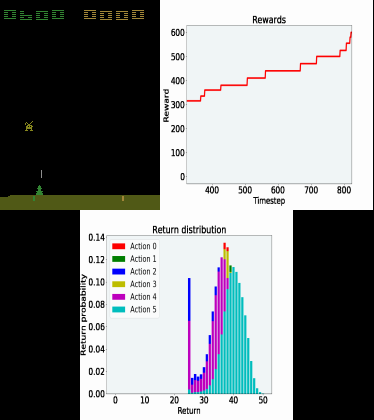

In [21]:
# @title Inspect individual video frames
from IPython.display import Image
frame_number = 823  # @param {type:"slider", min:0, max:999, step:1}
image_file = '/tmp/agent_viz/agent_viz/SpaceInvaders/rainbow/images/frame_{:06d}.png'.format(frame_number)
Image(image_file)